In [14]:
#Import initial necessary packages
import os, sys, email
import numpy as np 
import pandas as pd
from time import time
from gensim import corpora, models
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [70]:
#Load up LDA and W2V models
#LDA = models.LdaModel.load("E:/Use Case Testing/NLP/BM/lda_20.model")
model_W2V = models.Word2Vec.load("E:/Use Case Testing/NLP/OA/W2V_Skip_Gram.txt")

In [71]:
#test to make sure ouptut from LDA can mesh easily with W2V. 
model_W2V.most_similar ( positive = LDA.show_topic(2, topn=7)[1][0], topn=3)

[(u'lifornia', 0.7243218421936035),
 (u'californias', 0.7105699181556702),
 (u'ifornia', 0.6978088617324829)]

In [68]:
topics=[]
top_wds=[]

for i in range(0,LDA.num_topics):
    for j in range(0,3):
        top_wds.append(LDA.show_topic(i,topn=3)[j][0])
    topics.append(top_wds)
    top_wds=[]
    print('*Topic{}\n- {}'.format(i+1, ' '.join(topics[i])))
    print(model_W2V.most_similar(positive=topics[i], topn=2))

*Topic1
- error market court
[(u'ravary', 0.6459128856658936), (u'osiptel', 0.6458591222763062)]
*Topic2
- one gas million
[(u'degt', 0.7284470796585083), (u'roughl', 0.7196319103240967)]
*Topic3
- market california last
[(u'wholesal', 0.718111515045166), (u'dderkrtbnsjenergy', 0.7149790525436401)]
*Topic4
- report market one
[(u'seful', 0.6897307634353638), (u'nonoperational', 0.6878778338432312)]
*Topic5
- folder synchronizing houston
[(u'biographyhistory', 0.7090359926223755), (u'aadepartment', 0.6827552914619446)]
*Topic6
- gas market year
[(u'overyear', 0.7245335578918457), (u'weatheradjusted', 0.7221964597702026)]
*Topic7
- meeting market day
[(u'feburary', 0.7005361318588257), (u'dadrp', 0.6912646293640137)]
*Topic8
- market gas area
[(u'receiptsdeliveries', 0.7453171610832214), (u'kenova', 0.7348517179489136)]
*Topic9
- gas like meeting
[(u'meetingconf', 0.7111306190490723), (u'canwill', 0.7069607377052307)]
*Topic10
- state one gas
[(u'uppliers', 0.7340164184570312), (u'holesa

In [ ]:
############################################################
############################################################
## TSNE Testing with Word2Vec

In [93]:
#convert Word2Vec into two lists, one is dictionary, the other is
#the actual distance vector

word_vectors = [model_W2V[word] for word in model_W2V.vocab]
vocab = [word for word in model_W2V.vocab]

In [111]:
#create a small test sample for tNSE
wv_test = word_vectors[:100]
vocab_test = vocab[:100]

In [114]:
tsne = TSNE(2, random_state=0)
np.set_printoptions(suppress=True)
Y = tsne.fit_transform(wv_test)

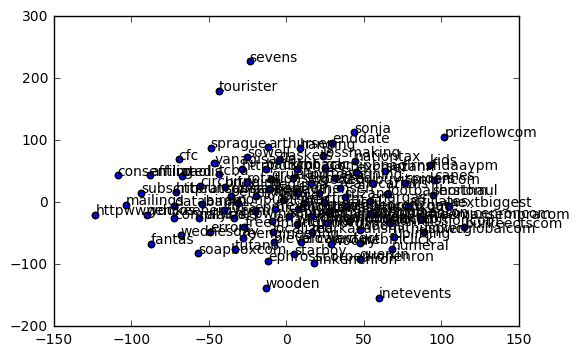

In [119]:

plt.scatter(Y[:,0],Y[:,1])
for label, x, y in zip(vocab_test,Y[:,0],Y[:,1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0), textcoords='offset points')
plt.show()

In [118]:
Y.shape

(100L, 2L)